# Author: Ayush Kakar
# Task: Water Quality Prediction


# Importing the libraries

In [1]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


# READING THE DATASET


In [2]:
df = pd.read_csv('water_potability.csv')

In [6]:
df


,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,NaN,392.449580,19.903225,NaN,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,NaN,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,NaN,402.883113,11.168946,77.488213,4.708658,1


In [4]:
df.shape

(3276, 10)

In [7]:

df.describe()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [8]:
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


# Cleaning and formatting the dataset


In [10]:
df.isnull().sum()

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [14]:
df['ph']=df['ph'].fillna(df['ph'].mean())
df['Sulfate']=df['Sulfate'].fillna(df['Sulfate'].mean())
df['Trihalomethanes']=df['Trihalomethanes'].fillna(df['Trihalomethanes'].mean())

In [16]:
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
...,...,...,...,...,...,...,...,...,...,...
3271,4.668102,193.681735,47580.991603,7.166639,359.948574,526.424171,13.894419,66.687695,4.435821,1
3272,7.808856,193.553212,17329.802160,8.061362,333.775777,392.449580,19.903225,66.396293,2.798243,1
3273,9.419510,175.762646,33155.578218,7.350233,333.775777,432.044783,11.039070,69.845400,3.298875,1
3274,5.126763,230.603758,11983.869376,6.303357,333.775777,402.883113,11.168946,77.488213,4.708658,1


# Exploratory Data Analysis(EDA)

In [17]:
background_color = '#F8EDF4'
color_palette = ['#F3AA51', '#FCF695', '#CEE5D5', '#B7D3E9', '#567ACE', '#BBB0DC', '#DB706C', '#F1C3AA','#A7E0E1', 'D9598C']

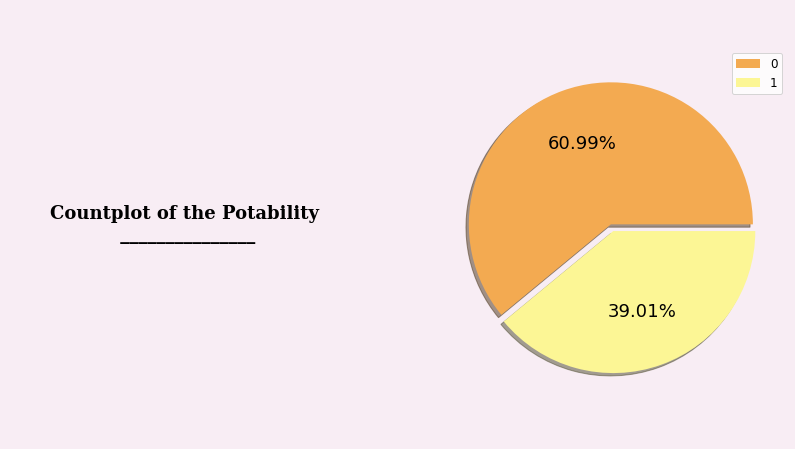

In [18]:
fig = plt.figure(figsize=(14, 8))
gs = fig.add_gridspec(1, 2)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])


# Title
ax0.text(0.5, 0.5, 'Countplot of the Potability\n _______________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontfamily='serif', fontweight='bold')
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.spines['bottom'].set_visible(False)


# Graph
g = ax1.pie(df['Potability'].value_counts(),
       autopct=lambda p : '{:.2f}%'.format(p),
       colors=color_palette,
       explode=(0, 0.05),
       shadow=True,
       textprops={'fontsize': 18})
plt.legend(g[0], [0, 1], loc='upper right', fontsize='large')


fig.patch.set_facecolor(background_color)
axes = [ax0, ax1]

ax0.set_facecolor(background_color)
for s in ['top', 'right', 'left']:
    ax0.spines[s].set_visible(False)

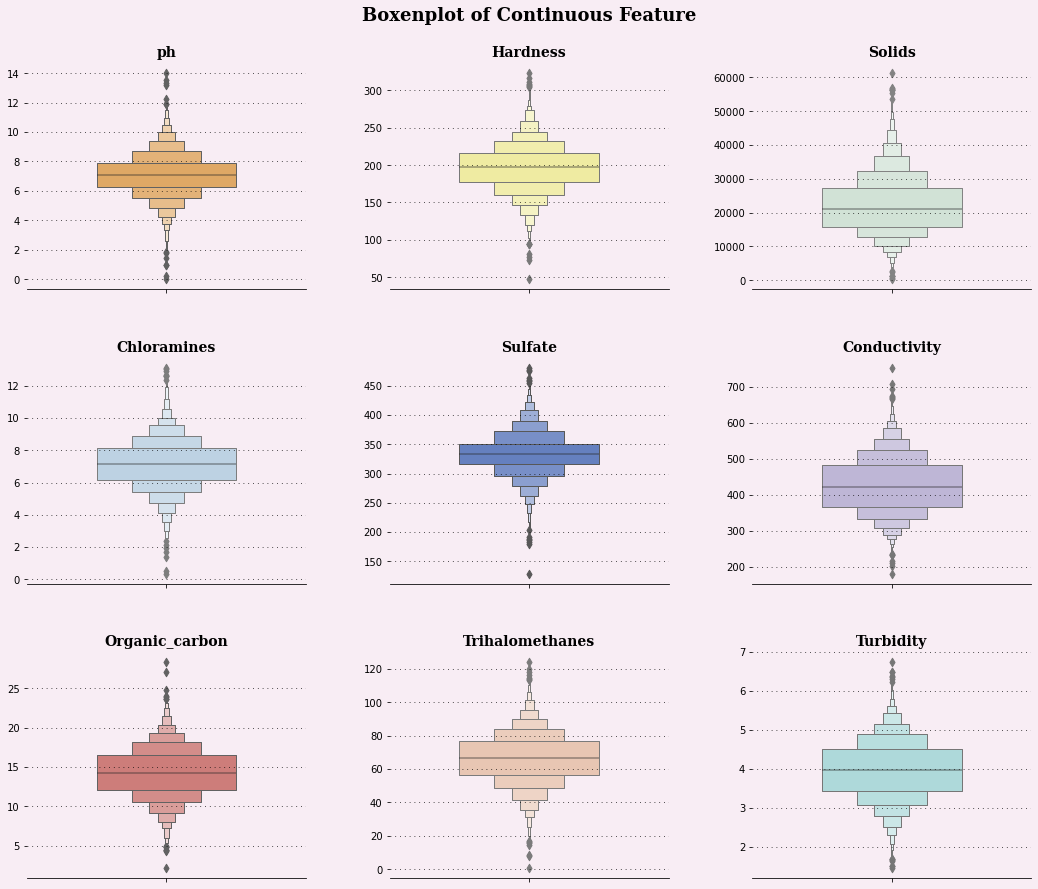

In [19]:
fig = plt.figure(figsize=(18, 15))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.3, hspace=0.3)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])
axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

fig.patch.set_facecolor(background_color)

# Title
ax1.text(0, 400, 'Boxenplot of Continuous Feature',
        fontsize=18, fontfamily='serif', fontweight='bold',
        horizontalalignment='center',
        verticalalignment='center')


# Graphs
for i, ax in enumerate(axes):
    ax.set_facecolor(background_color)
    ax.set_title(df.columns[i], fontsize=14, fontfamily='serif', fontweight='bold')
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
    
    sns.boxenplot(y=df.columns[i], data=df, ax=ax, palette=[color_palette[i]], width=0.5)
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    for s in ['top', 'right', 'left']:
        ax.spines[s].set_visible(False)

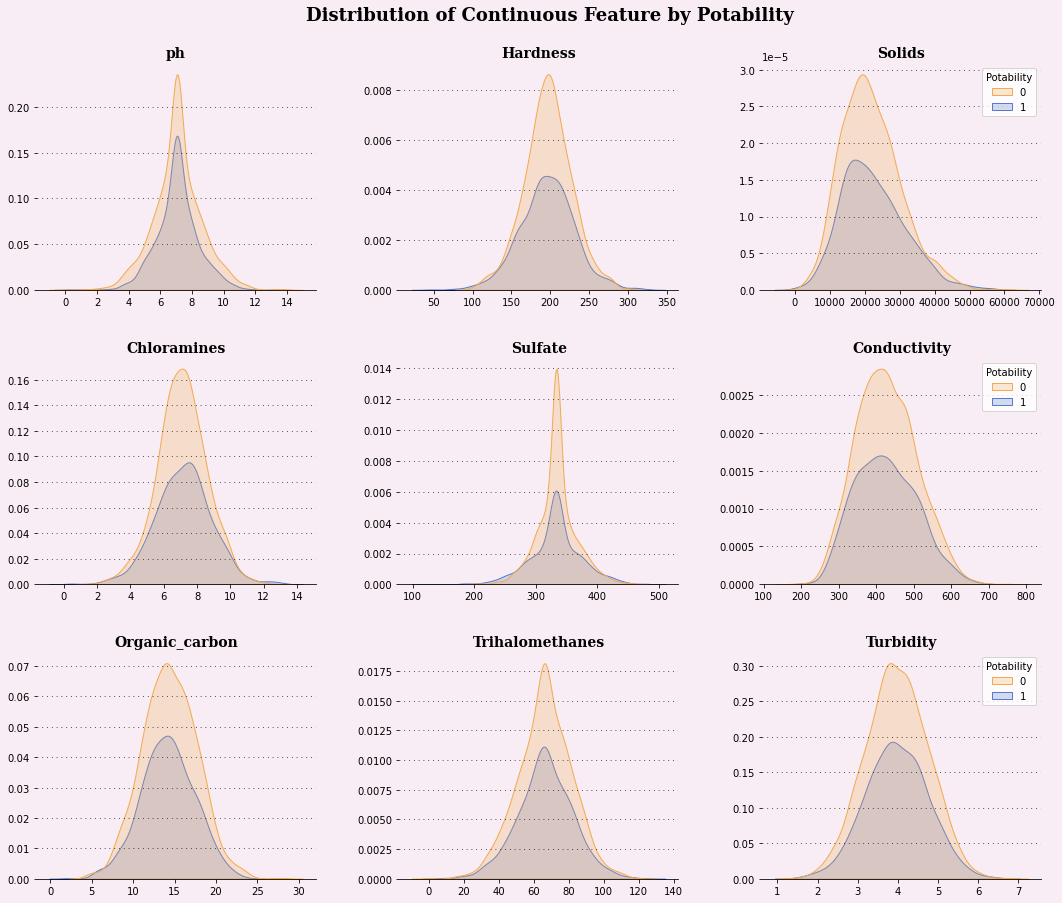

In [20]:
fig = plt.figure(figsize=(18, 15))
gs = fig.add_gridspec(3, 3)
gs.update(wspace=0.3, hspace=0.3)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])
ax2 = fig.add_subplot(gs[0, 2])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[1, 2])
ax6 = fig.add_subplot(gs[2, 0])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[2, 2])
axes = [ax0, ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8]

kde_palette = ['#F3AA51', '#567ACE']
fig.patch.set_facecolor(background_color)


# Title
ax1.text(200, 0.011, 'Distribution of Continuous Feature by Potability',
        fontsize=18, fontfamily='serif', fontweight='bold',
        horizontalalignment='center',
        verticalalignment='center')


# Graphs
for i, ax in enumerate(axes):
    dp_legend = False
    if i in [2, 5, 8]:
        dp_legend = True
        
    ax.set_facecolor(background_color)
    ax.set_title(df.columns[i], fontsize=14, fontfamily='serif', fontweight='bold')
    ax.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
    
    sns.kdeplot(x=df.columns[i], hue='Potability', data=df, fill=True, ax=ax, palette=kde_palette, legend=dp_legend)
    ax.set_xlabel('')
    ax.set_ylabel('')
    
    for s in ['top', 'right', 'left']:
        ax.spines[s].set_visible(False)

In [21]:
df.corr()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


# Correlation Matrix

<AxesSubplot:>

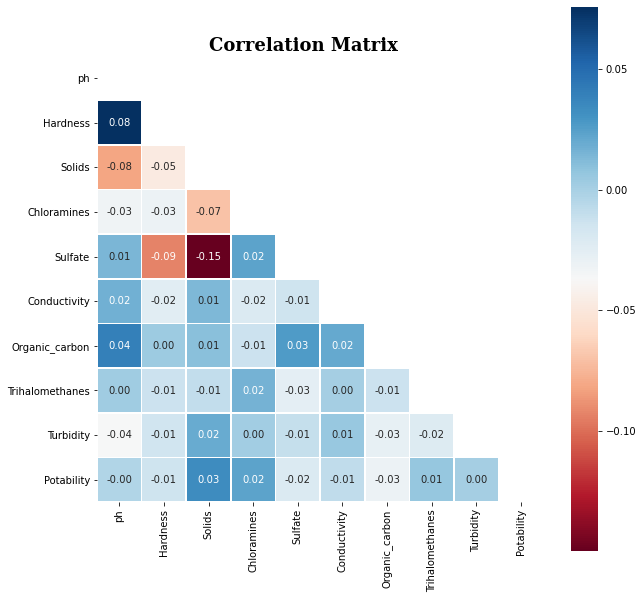

In [22]:
f, ax = plt.subplots(1, 1, figsize=(10, 10))

mask = np.triu(np.ones_like(df.corr()))
ax.text(2.5, -0.1, 'Correlation Matrix', fontsize=18, fontweight='bold', fontfamily='serif')
sns.heatmap(df.corr(), annot=True, fmt='.2f', cmap='RdBu', square=True, mask=mask, linewidth=0.7, ax=ax)

# Modelling

In [42]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

# Splitting the dataset into test and train

In [43]:
X = df.drop('Potability', axis=1)
y = df['Potability']

scaler = MinMaxScaler()
X = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# Logistic Regression

In [45]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
score_logreg = accuracy_score(y_pred, y_test)

print('Accuracy Score of Logistic Regression :', score_logreg)

Accuracy Score of Logistic Regression : 0.6093591047812817


# Random Forest Classifier

In [46]:
rf = RandomForestClassifier(n_estimators=1000)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
score_rf = accuracy_score(y_pred, y_test)

print('Accuracy Score of Random Forest Classifier :', score_rf)


Accuracy Score of Random Forest Classifier : 0.6897253306205493


# Decision Tree Classifier

In [47]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
score_dt = accuracy_score(y_pred, y_test)

print('Accuracy Score of Decision Tree Classifier :', score_dt)

Accuracy Score of Decision Tree Classifier : 0.5849440488301119


# # K nearest Neighbour score

Accuracy Score of K-Nearest Neighbors Classifier :  0.6307222787385555


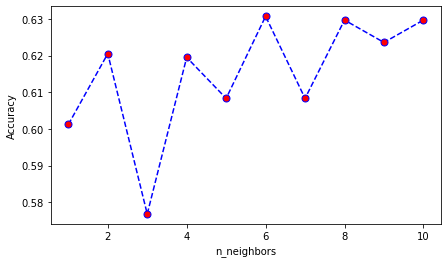

In [48]:
# Find n_neighbors for best score
accuracy = []

for i in range(1, 11):
    model = KNeighborsClassifier(n_neighbors = i)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy.append(model.score(X_test, y_test))

score_knn = max(accuracy)
print('Accuracy Score of K-Nearest Neighbors Classifier : ', score_knn)

plt.figure(figsize=(7, 4))
plt.plot(range(1,11), accuracy, linestyle='dashed', marker='o', color='blue',
        markersize=7, markerfacecolor='red')
plt.xlabel('n_neighbors')
plt.ylabel('Accuracy')
plt.show()

# SVM

In [49]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
score_svm = accuracy_score(y_pred, y_test)

print('Accuracy Score of Support Vector Classifier :', score_svm)

Accuracy Score of Support Vector Classifier : 0.6744659206510681


# Result

In [53]:
df_result = pd.DataFrame({'Model' : ['Logistic Regression', 'RandomForest', 
                         'Decision Tree', 'K-Nearest Neighbors', 'Support Vector'],
                         'Score' : [score_logreg, score_rf,  score_dt, score_knn, score_svm]})

df_result.sort_values(by='Score', ascending=False, inplace=True)


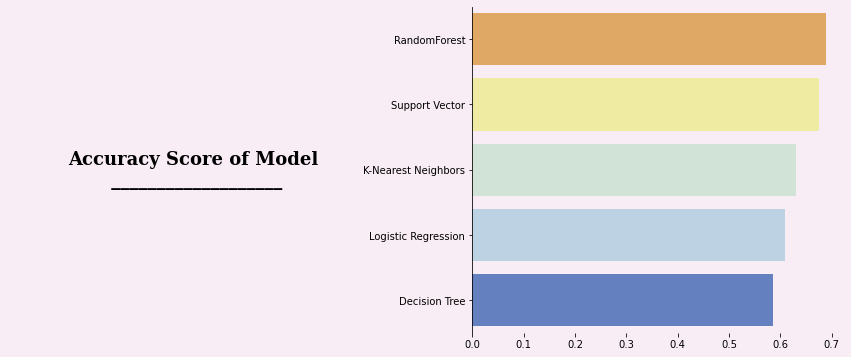

In [54]:
fig = plt.figure(figsize=(15, 6))
gs = fig.add_gridspec(1, 2)
gs.update(wspace=0.25)

ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[0, 1])

# Title
ax0.text(0.5, 0.5, 'Accuracy Score of Model\n ___________________',
        horizontalalignment='center',
        verticalalignment='center',
        fontsize=18, fontfamily='serif', fontweight='bold')
ax0.set_xticklabels([])
ax0.set_yticklabels([])
ax0.tick_params(left=False, bottom=False)
ax0.spines['left'].set_visible(False)
# Graph
ax1.grid(color='#000000', linestyle=':', axis='y', zorder=0, dashes=(1,5))
sns.barplot(x='Score', y='Model', data=df_result, palette=color_palette, ax=ax1)
ax1.set_xlabel('')
ax1.set_ylabel('')


fig.patch.set_facecolor(background_color)
axes = [ax0, ax1]

for ax in axes:
    ax.set_facecolor(background_color)
    for s in ['top', 'right', 'bottom']:
        ax.spines[s].set_visible(False)